TASK 1

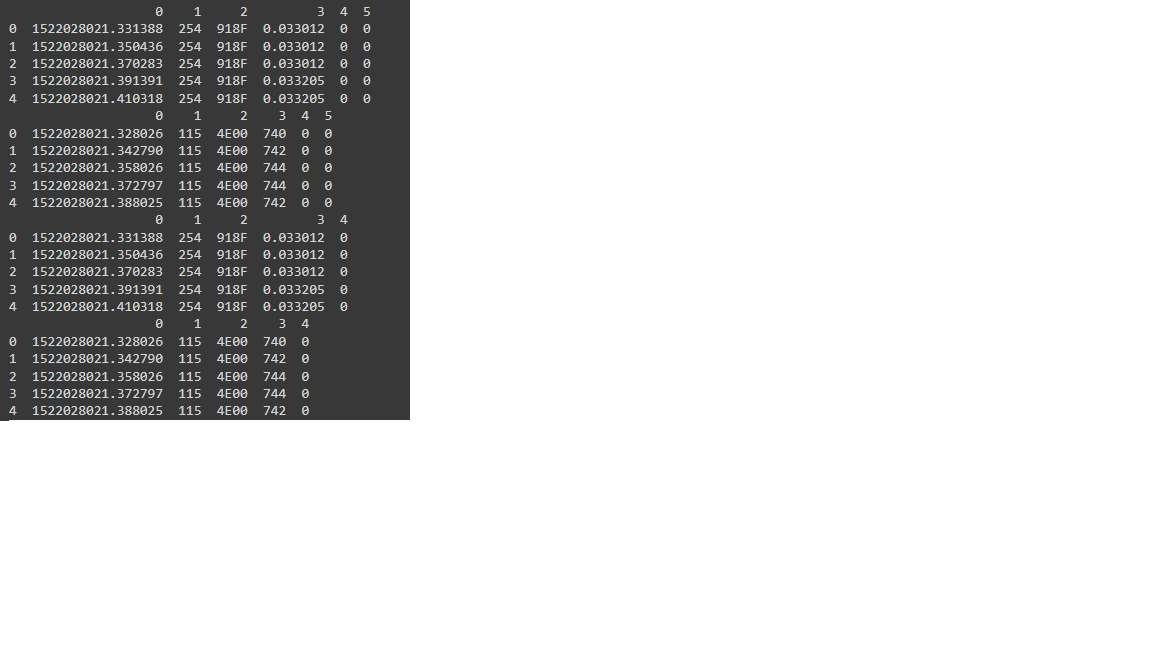

This image represents the data frame from the data sets.the data sets are CAN Bus log - injection of FFF as the speed reading.log
CAN Bus log - injection of RPM readings.log
CAN bus log - no injection of messages.log

TASK 2

                   0    1     2    3  4  5
0  1522028465.321875  254  918F  0.0  0  0
1  1522028465.341876  254  918F  0.0  0  0
2  1522028465.363927  254  918F  0.0  0  0
3  1522028465.381870  254  918F  0.0  0  0
4  1522028465.401861  254  918F  0.0  0  0
                   0    1     2    3  4  5
0  1522028465.316505  115  4E00  626  0  0
1  1522028465.331252  115  4E00  624  0  0
2  1522028465.346272  115  4E00  624  0  0
3  1522028465.361265  115  4E00  626  0  0
4  1522028465.376510  115  4E00  626  0  0
                   0    1     2    3  4
0  1522028465.321875  254  918F  0.0  0
1  1522028465.341876  254  918F  0.0  0
2  1522028465.363927  254  918F  0.0  0
3  1522028465.381870  254  918F  0.0  0
4  1522028465.401861  254  918F  0.0  0
                   0    1     2    3  4
0  1522028465.316505  115  4E00  626  0
1  1522028465.331252  115  4E00  624  0
2  1522028465.346272  115  4E00  624  0
3  1522028465.361265  115  4E00  626  0
4  1522028465.376510  115  4E00  626  0


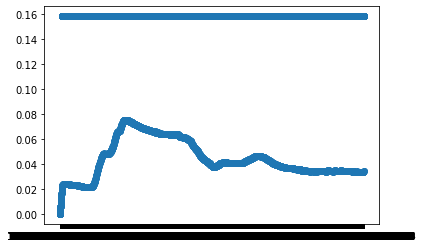

KMeans(n_clusters=2)


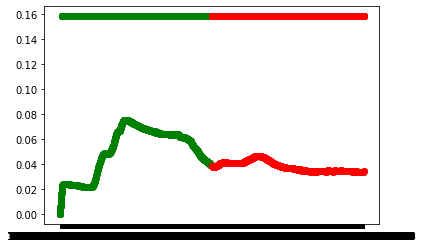

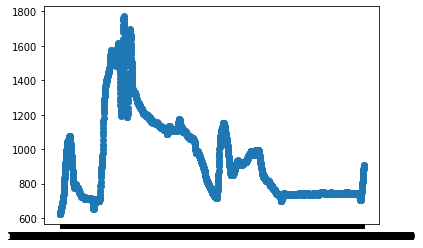

KMeans(n_clusters=2)


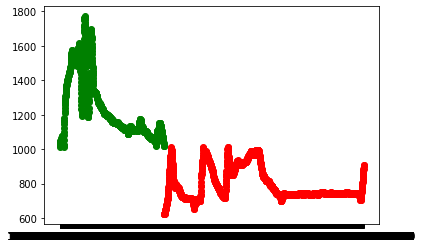

In [2]:
import pandas as pd
#import regex as re
import numpy as np
import csv

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def getData(filename):
  canData=[] #List to store teh can data
  f = open(filename)  
  read_file =f.readlines()
  
  stamp_list_speed = []
  PID_list_speed = []
  const1_list_speed = []
  change_list_speed = []
  value_list_speed = []
  value1_list_speed = []
  attack_list_speed = []
    
  stamp_list_rpm = []
  PID_list_rpm = []
  const1_list_rpm = []
  change_list_rpm = []
  value_list_rpm = []
  value1_list_rpm = []
  attack_list_rpm = []
  speed = []
  rpm = []
  i = 0
  labels=["stamp","PID","const1","change","value","value1","attack"]
  for row in read_file:
    
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33], 'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
    
    if record["PID"] == '254': 
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      val = (record['value'] * 0.62137119) /100
      speed.append(record['value'])      
      stamp_list_speed.append(row[1:18])
      PID_list_speed.append(row[25:28])
      const1_list_speed.append(row[29:33])
      change_list_speed.append(row[33:41])
      value_list_speed.append(val)   
      value1_list_speed.append("0")   
      attack_list_speed.append(record["attack"])
      nested_list_speed=[stamp_list_speed,PID_list_speed,const1_list_speed,change_list_speed,value_list_speed,value1_list_speed,attack_list_speed]  
      
    
    if record["PID"] == '115': 
      if record["value"] >= 65535:
        record["attack"] = 1      
      val = (record['value'] *2 )     
      stamp_list_rpm.append(row[1:18])
      PID_list_rpm.append(row[25:28])
      const1_list_rpm.append(row[29:33])
      change_list_rpm.append(row[33:41])
      value_list_rpm.append(val)   
      value1_list_rpm.append("0")   
      attack_list_rpm.append(record["attack"])
      nested_list_rpm=[stamp_list_rpm,PID_list_rpm,const1_list_rpm,change_list_rpm,value_list_rpm,value1_list_rpm,attack_list_rpm]    
      
  i = i+1   
  canData.append(record)
  record={}
  canData_speed_df = pd.DataFrame(list(zip(stamp_list_speed,PID_list_speed,const1_list_speed,value_list_speed,value1_list_speed,attack_list_speed)))
  canData_rpm_df = pd.DataFrame(list(zip(stamp_list_rpm,PID_list_rpm,const1_list_rpm,value_list_rpm,value1_list_rpm,attack_list_rpm)))    
    
  f.close()
    
  
  
  return canData_speed_df , canData_rpm_df

df_speed1,df_rpm1 = getData('/content/sample_data/CAN Bus log - injection of FFF as the speed reading.log')
print(df_speed1.head())
print(df_rpm1.head())
df_speed1.drop(df_speed1.columns[5], axis=1, inplace=True)
df_rpm1.drop(df_rpm1.columns[5],axis=1,inplace=True)
print(df_speed1.head())
print(df_rpm1.head())


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df_speed1[0],df_speed1[3])
plt.show()
km = KMeans(n_clusters=2)
print(km)
y_predicted = km.fit_predict(df_speed1[[0,3]])
y_predicted
df_speed1['cluster'] = y_predicted
df_speed1.head()
df_speed1_cluster1 = df_speed1[df_speed1.cluster==0]
df_speed_cluster2 = df_speed1[df_speed1.cluster==1]
plt.scatter(df_speed1_cluster1[0],df_speed1_cluster1[3],color='green')
plt.scatter(df_speed_cluster2[0],df_speed_cluster2[3],color='red')
plt.show()

plt.scatter(df_rpm1[0],df_rpm1[3])
plt.show()
km = KMeans(n_clusters=2)
print(km)
y_predicted = km.fit_predict(df_rpm1[[0,3]])
y_predicted
df_rpm1['cluster'] = y_predicted
df_rpm1.head()
df_rpm1_cluster1 = df_rpm1[df_rpm1.cluster==0]
df_rpm_cluster2 = df_rpm1[df_rpm1.cluster==1]
plt.scatter(df_rpm1_cluster1[0],df_rpm1_cluster1[3],color='green')
plt.scatter(df_rpm_cluster2[0],df_rpm_cluster2[3],color='red')


This graph represents the CAN Bus log-injection of FFF as the speed reading.log with k value equals to 2.K ia an unsupervised learning.by taking the k value 2 you can see the difference in the graph.

                   0    1     2         3  4  5
0  1522028021.331388  254  918F  0.033012  0  0
1  1522028021.350436  254  918F  0.033012  0  0
2  1522028021.370283  254  918F  0.033012  0  0
3  1522028021.391391  254  918F  0.033205  0  0
4  1522028021.410318  254  918F  0.033205  0  0
                   0    1     2    3  4  5
0  1522028021.328026  115  4E00  740  0  0
1  1522028021.342790  115  4E00  742  0  0
2  1522028021.358026  115  4E00  744  0  0
3  1522028021.372797  115  4E00  744  0  0
4  1522028021.388025  115  4E00  742  0  0
                   0    1     2         3  4
0  1522028021.331388  254  918F  0.033012  0
1  1522028021.350436  254  918F  0.033012  0
2  1522028021.370283  254  918F  0.033012  0
3  1522028021.391391  254  918F  0.033205  0
4  1522028021.410318  254  918F  0.033205  0
                   0    1     2    3  4
0  1522028021.328026  115  4E00  740  0
1  1522028021.342790  115  4E00  742  0
2  1522028021.358026  115  4E00  744  0
3  1522028021.372797  11

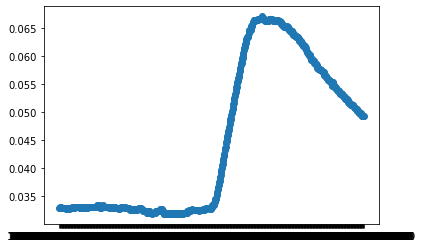

KMeans(n_clusters=2)


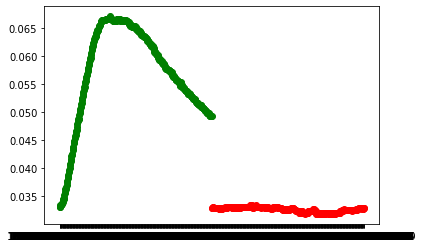

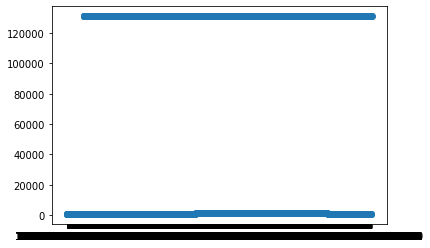

KMeans(n_clusters=2)


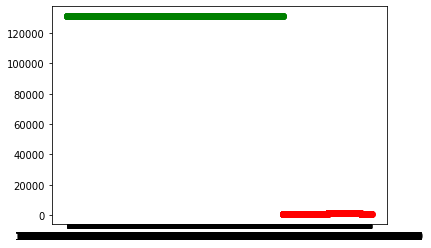

In [3]:
def getData(filename):
  canData=[] 
  f = open(filename)  
  read_file =f.readlines()
  
  stamp_list_speed = []
  PID_list_speed = []
  const1_list_speed = []
  change_list_speed = []
  value_list_speed = []
  value1_list_speed = []
  attack_list_speed = []
    
  stamp_list_rpm = []
  PID_list_rpm = []
  const1_list_rpm = []
  change_list_rpm = []
  value_list_rpm = []
  value1_list_rpm = []
  attack_list_rpm = []
  speed = []
  rpm = []
  i = 0
  labels=["stamp","PID","const1","change","value","value1","attack"]
  for row in read_file:
    
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33], 'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
    
    if record["PID"] == '254': 
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      val = (record['value'] * 0.62137119) /100
      speed.append(record['value'])      
      stamp_list_speed.append(row[1:18])
      PID_list_speed.append(row[25:28])
      const1_list_speed.append(row[29:33])
      change_list_speed.append(row[33:41])
      value_list_speed.append(val)   
      value1_list_speed.append("0")   
      attack_list_speed.append(record["attack"])
      nested_list_speed=[stamp_list_speed,PID_list_speed,const1_list_speed,change_list_speed,value_list_speed,value1_list_speed,attack_list_speed]  
      
    
    if record["PID"] == '115':  
      if record["value"] >= 65535:
        record["attack"] = 1      
      val = (record['value'] *2 )     
      stamp_list_rpm.append(row[1:18])
      PID_list_rpm.append(row[25:28])
      const1_list_rpm.append(row[29:33])
      change_list_rpm.append(row[33:41])
      value_list_rpm.append(val)   
      value1_list_rpm.append("0")   
      attack_list_rpm.append(record["attack"])
      nested_list_rpm=[stamp_list_rpm,PID_list_rpm,const1_list_rpm,change_list_rpm,value_list_rpm,value1_list_rpm,attack_list_rpm]    
      
  i = i+1   
  canData.append(record)
  record={}
  canData_speed_df = pd.DataFrame(list(zip(stamp_list_speed,PID_list_speed,const1_list_speed,value_list_speed,value1_list_speed,attack_list_speed)))
  canData_rpm_df = pd.DataFrame(list(zip(stamp_list_rpm,PID_list_rpm,const1_list_rpm,value_list_rpm,value1_list_rpm,attack_list_rpm)))    
   
  f.close()
    
  
  
  return canData_speed_df , canData_rpm_df

df_speed1,df_rpm1 = getData('/content/sample_data/CAN Bus log - injection of RPM readings.log')
print(df_speed1.head())
print(df_rpm1.head())
df_speed1.drop(df_speed1.columns[5], axis=1, inplace=True)
df_rpm1.drop(df_rpm1.columns[5],axis=1,inplace=True)
print(df_speed1.head())
print(df_rpm1.head())


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df_speed1[0],df_speed1[3])
plt.show()
km = KMeans(n_clusters=2)
print(km)
y_predicted = km.fit_predict(df_speed1[[0,3]])
y_predicted
df_speed1['cluster'] = y_predicted
df_speed1.head()
df_speed1_cluster1 = df_speed1[df_speed1.cluster==0]
df_speed_cluster2 = df_speed1[df_speed1.cluster==1]
plt.scatter(df_speed1_cluster1[0],df_speed1_cluster1[3],color='green')
plt.scatter(df_speed_cluster2[0],df_speed_cluster2[3],color='red')
plt.show()

plt.scatter(df_rpm1[0],df_rpm1[3])
plt.show()
km = KMeans(n_clusters=2)
print(km)
y_predicted = km.fit_predict(df_rpm1[[0,3]])
y_predicted
df_rpm1['cluster'] = y_predicted
df_rpm1.head()
df_rpm1_cluster1 = df_rpm1[df_rpm1.cluster==0]
df_rpm_cluster2 = df_rpm1[df_rpm1.cluster==1]
plt.scatter(df_rpm1_cluster1[0],df_rpm1_cluster1[3],color='green')
plt.scatter(df_rpm_cluster2[0],df_rpm_cluster2[3],color='red')



K ia an unsupervised learning.by taking the k value 2 you can see the difference in the graph.This graph represents the CAN Bus log - injection of RPM readings.log with k value 2.

                   0    1     2    3  4  5
0  1522004165.996440  254  918F  0.0  0  0
1  1522004166.016375  254  918F  0.0  0  0
2  1522004166.036373  254  918F  0.0  0  0
3  1522004166.056434  254  918F  0.0  0  0
4  1522004166.076394  254  918F  0.0  0  0
                   0    1     2    3  4  5
0  1522004165.993044  115  4E00  636  0  0
1  1522004166.008046  115  4E00  640  0  0
2  1522004166.023050  115  4E00  640  0  0
3  1522004166.038072  115  4E00  638  0  0
4  1522004166.053056  115  4E00  638  0  0
                   0    1     2    3  4
0  1522004165.996440  254  918F  0.0  0
1  1522004166.016375  254  918F  0.0  0
2  1522004166.036373  254  918F  0.0  0
3  1522004166.056434  254  918F  0.0  0
4  1522004166.076394  254  918F  0.0  0
                   0    1     2    3  4
0  1522004165.993044  115  4E00  636  0
1  1522004166.008046  115  4E00  640  0
2  1522004166.023050  115  4E00  640  0
3  1522004166.038072  115  4E00  638  0
4  1522004166.053056  115  4E00  638  0


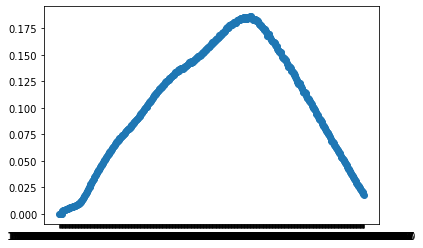

KMeans(n_clusters=2)


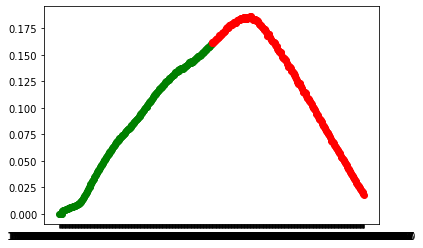

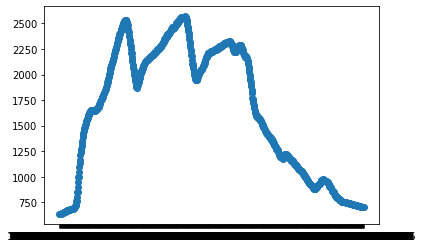

KMeans(n_clusters=2)


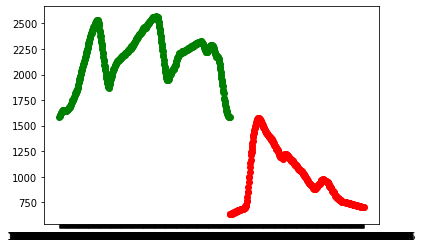

In [4]:
def getData(filename):
  canData=[] 
  f = open(filename)  
  read_file =f.readlines()
  
  stamp_list_speed = []
  PID_list_speed = []
  const1_list_speed = []
  change_list_speed = []
  value_list_speed = []
  value1_list_speed = []
  attack_list_speed = []
    
  stamp_list_rpm = []
  PID_list_rpm = []
  const1_list_rpm = []
  change_list_rpm = []
  value_list_rpm = []
  value1_list_rpm = []
  attack_list_rpm = []
  speed = []
  rpm = []
  i = 0
  labels=["stamp","PID","const1","change","value","value1","attack"]
  for row in read_file:
    
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33], 'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
    
    if record["PID"] == '254': 
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      val = (record['value'] * 0.62137119) /100
      speed.append(record['value'])      
      stamp_list_speed.append(row[1:18])
      PID_list_speed.append(row[25:28])
      const1_list_speed.append(row[29:33])
      change_list_speed.append(row[33:41])
      value_list_speed.append(val)   
      value1_list_speed.append("0")   
      attack_list_speed.append(record["attack"])
      nested_list_speed=[stamp_list_speed,PID_list_speed,const1_list_speed,change_list_speed,value_list_speed,value1_list_speed,attack_list_speed]  
      
    
    if record["PID"] == '115':  
      if record["value"] >= 65535:
        record["attack"] = 1      
      val = (record['value'] *2 )     
      stamp_list_rpm.append(row[1:18])
      PID_list_rpm.append(row[25:28])
      const1_list_rpm.append(row[29:33])
      change_list_rpm.append(row[33:41])
      value_list_rpm.append(val)   
      value1_list_rpm.append("0")   
      attack_list_rpm.append(record["attack"])
      nested_list_rpm=[stamp_list_rpm,PID_list_rpm,const1_list_rpm,change_list_rpm,value_list_rpm,value1_list_rpm,attack_list_rpm]    
      
  i = i+1   
  canData.append(record)
  record={}
  canData_speed_df = pd.DataFrame(list(zip(stamp_list_speed,PID_list_speed,const1_list_speed,value_list_speed,value1_list_speed,attack_list_speed)))
  canData_rpm_df = pd.DataFrame(list(zip(stamp_list_rpm,PID_list_rpm,const1_list_rpm,value_list_rpm,value1_list_rpm,attack_list_rpm)))    
  
  f.close()
    
  
  
  return canData_speed_df , canData_rpm_df

df_speed1,df_rpm1 = getData('/content/sample_data/CAN bus log - no injection of messages.log')
print(df_speed1.head())
print(df_rpm1.head())
df_speed1.drop(df_speed1.columns[5], axis=1, inplace=True)
df_rpm1.drop(df_rpm1.columns[5],axis=1,inplace=True)
print(df_speed1.head())
print(df_rpm1.head())


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df_speed1[0],df_speed1[3])
plt.show()
km = KMeans(n_clusters=2)
print(km)
y_predicted = km.fit_predict(df_speed1[[0,3]])
y_predicted
df_speed1['cluster'] = y_predicted
df_speed1.head()
df_speed1_cluster1 = df_speed1[df_speed1.cluster==0]
df_speed_cluster2 = df_speed1[df_speed1.cluster==1]
plt.scatter(df_speed1_cluster1[0],df_speed1_cluster1[3],color='green')
plt.scatter(df_speed_cluster2[0],df_speed_cluster2[3],color='red')
plt.show()

plt.scatter(df_rpm1[0],df_rpm1[3])
plt.show()
km = KMeans(n_clusters=2)
print(km)
y_predicted = km.fit_predict(df_rpm1[[0,3]])
y_predicted
df_rpm1['cluster'] = y_predicted
df_rpm1.head()
df_rpm1_cluster1 = df_rpm1[df_rpm1.cluster==0]
df_rpm_cluster2 = df_rpm1[df_rpm1.cluster==1]
plt.scatter(df_rpm1_cluster1[0],df_rpm1_cluster1[3],color='green')
plt.scatter(df_rpm_cluster2[0],df_rpm_cluster2[3],color='red')


Unsupervised learning is K. The difference in the graph can be seen by taking the k value to be 2. This graph displays the no injection of messages into the CAN Bus log. k = 2 in the log.

TASK 3

creation started
creation end
creation started
creation end
creation started
creation end
creation started
creation end
creation started
creation end
creation started
creation end


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


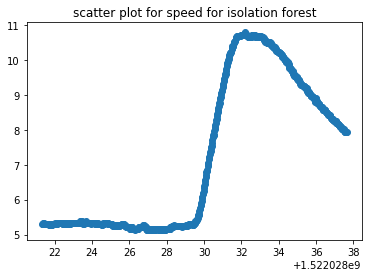

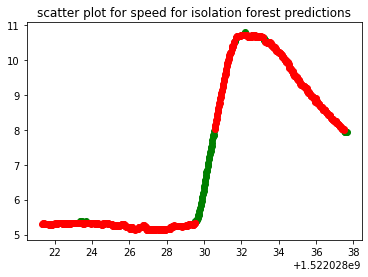

            stamp  PID const1    change     value  value2    scores  anomaly
102  1.522028e+09  254   918F  CE40C3A7  5.381075       0 -0.013711       -1
105  1.522028e+09  254   918F  9E40F3A7  5.381075       0 -0.013711       -1
107  1.522028e+09  254   918F  7E4013A7  5.381075       0 -0.013711       -1
117  1.522028e+09  254   918F  DE40B3A7  5.381075       0 -0.013711       -1
410  1.522028e+09  254   918F  8E4703A7  5.381075       0 -0.013711       -1
..            ...  ...    ...       ...       ...     ...       ...      ...
811  1.522028e+09  254   918F  E35613A4  7.928696       0 -0.004868       -1
812  1.522028e+09  254   918F  D35623A4  7.928696       0 -0.004868       -1
813  1.522028e+09  254   918F  C35633A4  7.928696       0 -0.004868       -1
814  1.522028e+09  254   918F  B35643A4  7.928696       0 -0.004868       -1
815  1.522028e+09  254   918F  A35653A4  7.928696       0 -0.004868       -1

[82 rows x 8 columns]
speed ends


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


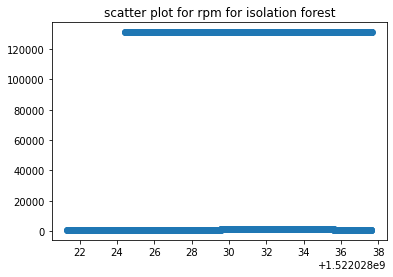

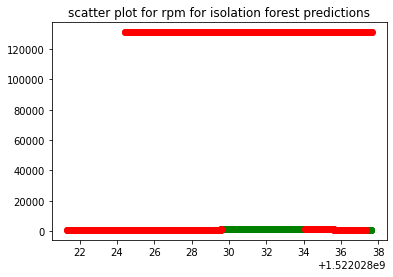

            stamp  PID  const1    change  value  value2    scores  anomaly
861  1.522028e+09  115     4.0  01FA0000    728       0 -0.005462       -1
865  1.522028e+09  115     4.0  01FA0000    728       0 -0.005462       -1
869  1.522028e+09  115     4.0  01F80000    716       0 -0.032995       -1
873  1.522028e+09  115     4.0  01F80000    716       0 -0.032995       -1
877  1.522028e+09  115     4.0  01F80000    706       0 -0.056761       -1


In [5]:
import numpy as np
import csv
def create_dataFile(labels,path,data):
    print('creation started')
    fo = open(path,'a')
    fo.write(labels)
    for line in data:
        fo.write("\n")
        data = line['stamp']+","+line['PID']+","+line['const1']+","+line['change']+","+str(line['value'])+","+str(line['value2'])+","+str(line['attack'])
        fo.write(data)
    fo.close()    
    print('creation end')
    
def getData(filename):
  canData=[] #List to store teh can data
  f = open(filename)  
  read_file =f.readlines() 
  canData_speed = []
  canData_rpm = []
  speed = []
  rpm = []
  i = 0
  for row in read_file:
    #Change the positions of the values if needed
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33], 'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
    
    if record["PID"] == '254': #Processing of speed
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      speed.append(record['value'])      
      canData_speed.append(record)
    
    if record["PID"] == '115': #Processing of RPM 
      if record["value"] >= 65535:
        record["attack"] = 1
      record['value'] =  (record['value'] * 2)
      rpm.append(record['value'])
      canData_rpm.append(record)
    i = i+1   
    canData.append(record)
    record={}    
  f.close()  
  #Change the return value to speed or RPM if you want to return the other lists
  return canData_speed , canData_rpm
df1_speed , df1_rpm = getData('/content/sample_data/CAN Bus log - injection of FFF as the speed reading.log')
df2_speed , df2_rpm = getData("/content/sample_data/CAN Bus log - injection of FFF as the speed reading.log")
df3_speed , df3_rpm = getData("/content/sample_data/CAN Bus log - injection of RPM readings.log")
labeling = 'stamp,PID,const1,change,value,value2,attack'
create_dataFile(labeling,"/content/sample_data/ds1_data_speed.csv",df1_speed)
create_dataFile(labeling,'/content/sample_data/ds1_data_rpm.csv',df1_rpm)
create_dataFile(labeling,'/content/sample_data/ds2_data_speed.csv',df2_speed)
create_dataFile(labeling,'/content/sample_data/ds2_data_rpm.csv',df2_rpm)
create_dataFile(labeling,'/content/sample_data/ds3_data_speed.csv',df3_speed)
create_dataFile(labeling,'/content/sample_data/ds3_data_rpm.csv',df3_rpm)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
#########for speed 
df = pd.read_csv('/content/sample_data/ds3_data_speed.csv')
df = df.drop(['attack'],axis=1)
model_IF=IsolationForest(n_estimators=50, max_samples='auto', contamination=0.1,max_features=1.0)
model_IF.fit(df[["value"]])
df['scores']=model_IF.decision_function(df[['value']])
df['anomaly']=model_IF.predict(df[['value']])
%matplotlib inline
plt.scatter(df['stamp'],df['value'])
plt.title('scatter plot for speed for isolation forest')
plt.show()
df_speed_cluster1 = df[df.anomaly== -1]
df_speed_cluster2 = df[df.anomaly == 1]
plt.scatter(df_speed_cluster1['stamp'],df_speed_cluster1['value'],color='green')
plt.scatter(df_speed_cluster2['stamp'],df_speed_cluster2['value'],color='red')
plt.title('scatter plot for speed for isolation forest predictions')
plt.show()
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)
print('speed ends')
###########for rpm
df = pd.read_csv('/content/sample_data/ds3_data_rpm.csv')
df = df.drop(['attack'],axis=1)
model_IF=IsolationForest(n_estimators=50, max_samples='auto', contamination=0.1,max_features=1.0)
model_IF.fit(df[["value"]])
df['scores']=model_IF.decision_function(df[['value']])
df['anomaly']=model_IF.predict(df[['value']])
%matplotlib inline
plt.scatter(df['stamp'],df['value'])
plt.title('scatter plot for rpm for isolation forest')
plt.show()

df_speed_cluster1 = df[df.anomaly== -1]
df_speed_cluster2 = df[df.anomaly == 1]
plt.scatter(df_speed_cluster1['stamp'],df_speed_cluster1['value'],color='green')
plt.scatter(df_speed_cluster2['stamp'],df_speed_cluster2['value'],color='red')
plt.title('scatter plot for rpm for isolation forest predictions')
plt.show()
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly.head())


We distributed the points based on speed and RPM while taking into account the aforementioned isolation forest algorithm. The output that we received in the form of graphs discusses the two concepts. This table of statistics displays values for vehicle speeds. We additionally anticipated the speed that would be regarded as the normal values. There is a potential that the vehicles' speeds will fluctuate constantly. To validate the data, it defines the automobile data as ID and timestamp.

TASK 4

It uses unsupervised learning methodology and unsupervised data. It makes use of data by organizing and grouping. By utilizing the duration of the data, we discovered how to identify the centroid. We can identify the little into the closest clusters according to the preceding graphical representation. We created the scatter plots by utilizing these datasets.

An unsupervised machine learning approach called the isolation forest algorithm accommodates input that is untrained in all respects.
The majority of the data sets that will be used for ML approaches are often trained models that are pre-defined models.